In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import models
from keras.models import load_model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.utils import img_to_array
import os
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns


In [2]:
path = "C://Users//Aayush Bhat//Desktop//jupyter//CV//UTKFace"




In [3]:
len(os.listdir(path))

23709

# Data Processing

In [23]:
#Accessing images from the UTKFace dataset which contains ages, gender and ethnicity of the images in the filename.
#Also resized the images from (200,200) ---> (64,64) for more efficient data processing.

age_label = []
gender_label = [] 
ethnicity_label = []
images = []

for filename in os.listdir(path):
    
    split_list = filename.split('_')
    
    if len(split_list) == 4:
        
        age_label.append(np.array(split_list[0]))
        gender_label.append(np.array(split_list[1]))
        ethnicity_label.append(np.array(split_list[2]))
        image = cv2.imread(path+"/"+filename)
        image = cv2.resize(image, (64,64))

        images.append(np.array(image))
        
        
    elif len(split_list) == 3:
        count += 1
        age_label.append(np.array(split_list[0]))
        gender_label.append(np.array(split_list[0]))
        ethnicity_label.append(np.array(0))
        image = cv2.imread(path+"/"+filename)
        image = cv2.resize(image, (64,64))
        images.append(np.array(image))
   
        


In [28]:
age_label = np.array(age_label, dtype =np.int64)
gender_label = np.array(gender_label, dtype =np.int64)
ethnicity_label = np.array(ethnicity_label, np.int64)

images = np.array(images, np.float32)

images = images/255

#Converting into numpy arrays and Normalizing the images for more accurate analysis

# Exploratory Data Analysis



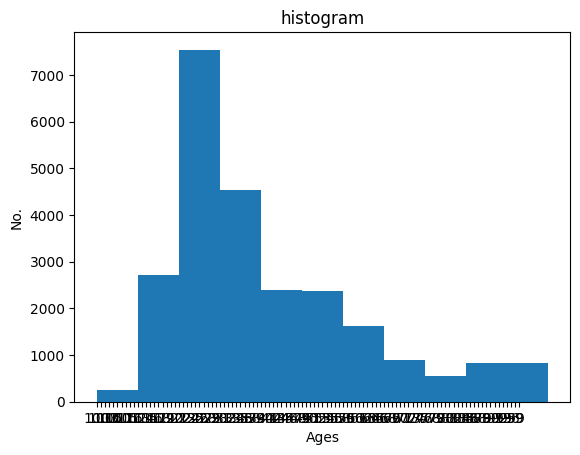

In [24]:
from matplotlib import pyplot as plt 
  
   

plt.hist(age_label, bins = [0,10,20,30,40,50,60,70,80,90,110]) 
plt.xlabel("Ages")
plt.ylabel("No.")
plt.title("histogram") 
plt.show()

In [29]:
encoded_age = []

i=0
while(i<23708):
    if (age_label[i]>=0 and age_label[i] <=8):
         encoded_age.append(np.array(0))
    elif (age_label[i] > 8 and age_label[i] <19):
         encoded_age.append(np.array(1))
    elif (age_label[i] >18 and age_label[i] < 30):
         encoded_age.append(np.array(2))
    elif (age_label[i] > 29 and age_label[i] < 60):
         encoded_age.append(np.array(3))
    elif (age_label[i] > 59):
         encoded_age.append(np.array(4))

            
    i +=1


#Encoding the ages into groups based on their ages. I made the following 5 classes:
# 1) [0-8]
# 2) [9-18]
# 3) [19-29]
# 4) [29-60]
# 5) [60+]

#These groups were formed after thorough analysis of the distribution of ages in the dataset and the
#accuracy of model formed the respective encodings

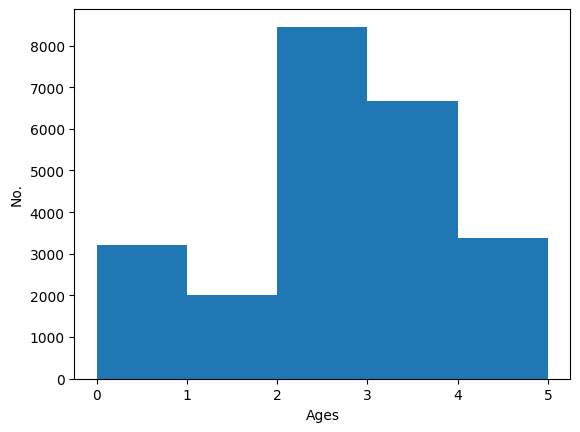

In [38]:
plt.hist(encoded_age, bins = [0,1,2,3,4,5]) 

plt.xlabel("Ages")
plt.ylabel("No.")
plt.show()

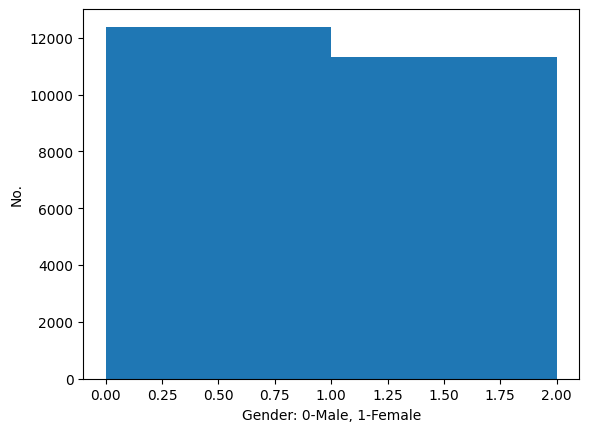

In [37]:
plt.hist(gender_label, bins = [0,1,2]) 

plt.xlabel("Gender: 0-Male, 1-Female")
plt.ylabel("No.")
plt.show()

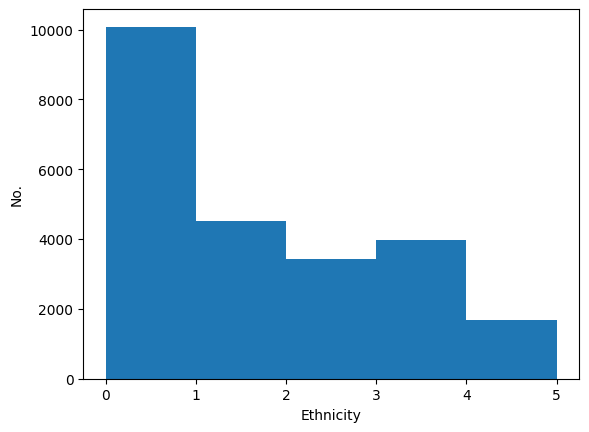

In [39]:
plt.hist(ethnicity_label, bins = [0,1,2,3,4,5]) 

plt.xlabel("Ethnicity")
plt.ylabel("No.")
plt.show()

# 0 - White
# 1 - Black
# 2 - Asian
# 3 - Indian
# 4 - Others


In [12]:

encoded_age = np.array(encoded_age)
classes_age = ['[0-10]','[10-21]', '[22-32]', '[32,55]', '[56+]']
classes_gender =['Male', 'Female']
classes_eth = ['White', 'Black', 'Asian', 'Indian', 'Others']

In [13]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, encoded_age, random_state= 50)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender_label, random_state= 28)

x_train_eth, x_test_eth, y_train_eth, y_test_eth = train_test_split(images, ethnicity_label, random_state= 28)

#Splitting the dataset into training and testing datasets

#  Creating and Reviewing the Model

# Age Prediction Model

In [40]:
age = models.Sequential()


age.add(Conv2D(filters =32,kernel_size =  (3,3), activation='relu', input_shape=(64, 64, 3)))
age.add(MaxPooling2D((2,2)))

age.add(Conv2D(filters =64, kernel_size = (3,3), activation='relu'))
age.add(MaxPooling2D((2,2)))

age.add(Conv2D(filters =128, kernel_size = (3,3), activation='relu'))
age.add(MaxPooling2D((2,2)))

age.add(Conv2D(filters =256, kernel_size = (3,3), activation='relu'))
age.add(MaxPooling2D((2,2)))


age.add(Flatten())
age.add(Dropout(0.4))
age.add(Dense(64, activation='relu'))

age.add(Dense(5, activation='softmax'))

# Using a convulational neural network with 4 layers and then a normal network to build the model
#Also used a Dropout layer to minimize the Overfitting

In [17]:
age.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics =['accuracy'],

)

In [18]:
age.fit(x_train_age, y_train_age, batch_size = 128, epochs= 10, verbose =2)

Epoch 1/10
139/139 - 45s - loss: 1.4770 - accuracy: 0.3568 - 45s/epoch - 322ms/step
Epoch 2/10
139/139 - 43s - loss: 1.3371 - accuracy: 0.4406 - 43s/epoch - 307ms/step
Epoch 3/10
139/139 - 43s - loss: 1.1682 - accuracy: 0.5121 - 43s/epoch - 310ms/step
Epoch 4/10
139/139 - 45s - loss: 1.0786 - accuracy: 0.5519 - 45s/epoch - 325ms/step
Epoch 5/10
139/139 - 42s - loss: 1.0374 - accuracy: 0.5700 - 42s/epoch - 305ms/step
Epoch 6/10
139/139 - 42s - loss: 1.0038 - accuracy: 0.5871 - 42s/epoch - 306ms/step
Epoch 7/10
139/139 - 42s - loss: 0.9816 - accuracy: 0.5974 - 42s/epoch - 301ms/step
Epoch 8/10
139/139 - 41s - loss: 0.9569 - accuracy: 0.6068 - 41s/epoch - 298ms/step
Epoch 9/10
139/139 - 41s - loss: 0.9383 - accuracy: 0.6137 - 41s/epoch - 297ms/step
Epoch 10/10
139/139 - 41s - loss: 0.9134 - accuracy: 0.6241 - 41s/epoch - 298ms/step


In [19]:
age.evaluate(x_test_age, y_test_age, batch_size=16)

# The final model i used had an accuracy of close to 63%
# I found that i could increase the accuracy till 70% using lesser classes of prediction but for the sake of a more
# comprehensive model, i used this model

371/371 [==============================] - 4s 10ms/step - loss: 0.9060 - accuracy: 0.6221


[0.9060399532318115, 0.6220685243606567]

In [20]:
preds=[]
j=0
while j<5927:
    preds.append(np.array(age_model.predict(np.expand_dims(x_test_age[j], axis=0)).argmax()))
    j +=1

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


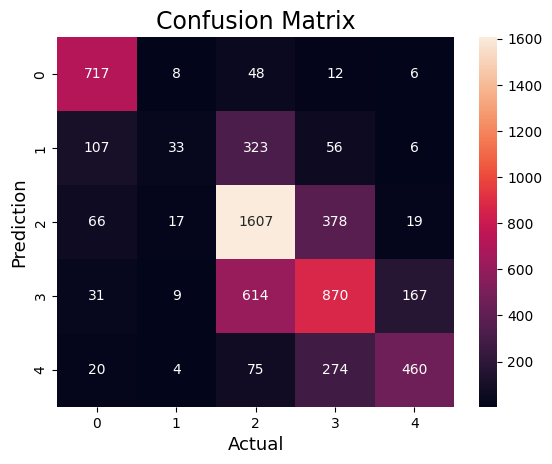

In [41]:
preds = np.array(preds)
matrix = confusion_matrix(y_test_age, preds)

sns.heatmap(matrix,
            annot=True,
            fmt='g')
            
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# From the confusion matrix, we can see that the predicitions between [20-29] & [30-59] have lots of converging

In [42]:
age.save('age_model_v6_62_21.h5')

# Gender Prediction Model

In [ ]:
gen.add(Conv2D(filters =32,kernel_size =  (3,3), activation='relu', input_shape=(64, 64, 3)))
gen.add(MaxPooling2D((2,2)))

gen.add(Conv2D(filters =64, kernel_size = (3,3), activation='relu'))
gen.add(MaxPooling2D((2,2)))

gen.add(Conv2D(filters =128, kernel_size = (3,3), activation='relu'))
gen.add(MaxPooling2D((2,2)))

gen.add(Flatten())

gen.add(Dense(64, activation='relu'))
gen.add(Dropout(0.5))
gen.add(Dense(1, activation='sigmoid'))

# Its a similar model but its a binary classification model instead of a multi-classification model.
# Instead of softmax activation for the last layer, i used a sigmoid function since it suited the model better on testing

In [84]:
gen.compile(
    loss= 'binary_crossentropy',
    optimizer =  tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics =['accuracy'],
)

# Binary Crossentropy is the best loss function for binary classification problems

In [85]:
gen.fit(x_train_gender, y_train_gender, batch_size = 128, epochs= 10, verbose =2)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Aayush Bhat\anaconda3\envs\tf_cpu\Lib\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [38]:
gen.evaluate(x_test_gender, y_test_gender, batch_size=16)

# This model has a very good accuracy (86.45%) and upon testing too, i found that it predicts the correct model more often 
#than not.

371/371 [==============================] - 3s 8ms/step - loss: 0.3068 - accuracy: 0.8645


[0.3068118393421173, 0.8645182847976685]

In [45]:
preds_1=[]
j=0
while j<5927:
    preds_1.append(np.round((gender_model.predict(np.expand_dims(x_test_gender[j], axis=0)))).astype(int))
    j +=1

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


In [40]:
gen.save('gen_model_v1_86_45.h5')

# Ethnicity Prediction Model

In [55]:
eth = models.Sequential()
eth.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = (64,64, 3)))
eth.add(MaxPooling2D((2,2)))

eth.add(Conv2D(filters = 128, kernel_size = (3,3), activation = "relu",padding='same'))
eth.add(MaxPooling2D((2,2)))

eth.add(Conv2D(filters = 256, kernel_size = (3,3), activation = "relu", padding='same'))
eth.add(MaxPooling2D((2,2)))





eth.add(Flatten())


eth.add(Dense(64, activation="relu"))
eth.add(Dropout(0.4))

eth.add(Dense(5, activation="softmax"))

# The construction of this model is very similar to the age prediction model and both perform similar tasks.

In [56]:
eth.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics =['accuracy'],

)

In [ ]:
eth.fit(x_train_eth, y_train_eth, batch_size = 128, epochs= 10, verbose =2)

In [55]:
eth.evaluate(x_test_eth, y_test_eth, batch_size=16)



371/371 [==============================] - 4s 11ms/step - loss: 0.7551 - accuracy: 0.7339


[0.7550636529922485, 0.733929455280304]

In [56]:
eth.save('eth_model_v2_73.39.h5')

In [57]:
preds_1=[]
j=0
while j<5927:
    preds_1.append(np.array(eth_model.predict(np.expand_dims(x_test_eth[j], axis=0)).argmax()))
    j +=1

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


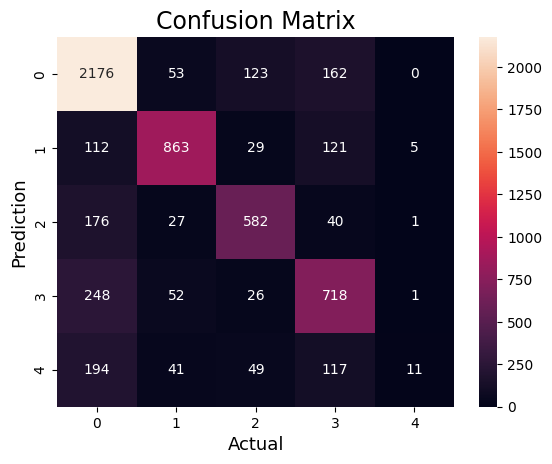

In [58]:
preds_1 = np.array(preds_1)
matrix = confusion_matrix(y_test_eth, preds_1)

sns.heatmap(matrix,
            annot=True,
            fmt='g')
            
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# From the confusion matrix, we can observe that the model is highly accurate.

In [21]:
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# Face detection model from OpenCV

In [44]:
age_model = load_model('age_model_v2_62_68.h5')
gender_model = load_model('gen_model_v1_86_45.h5')
eth_model = load_model('eth_model_v2_73.39.h5')

#Loading the best models from the folder

# Creating the Real-Time Video Capturing Interface

In [23]:
 feed = cv2.VideoCapture(0)

while True:
    ret, frame = feed.read()
    
    faces = face_detector.detectMultiScale(frame,1.3,5)
    
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(2,25,255),2)
        onlyface = frame[y:y+h, x:x+w]
        onlyface = cv2.resize(onlyface, (64,64), interpolation = cv2.INTER_AREA)
        
        img_pred = onlyface.astype('float32') 
        img_pred = img_pred/255
        img_pred = img_to_array(img_pred)
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        age_pred = classes_age[age.predict(np.expand_dims(img_pred, axis=0)).argmax()]
        cv2.putText(frame, age_pred, (40,40), font ,1, (0,200,100), 4 , cv2.LINE_AA)
        
        gender = np.round((gender_model.predict(np.expand_dims(img_pred, axis=0)))).astype(int)
        gender_pred = classes_gender[gender[0][0]]
        cv2.putText(frame, gender_pred, (40,70), font ,1, (0,200,100), 4 , cv2.LINE_AA)
        
        eth_pred = classes_eth[eth_model.predict(np.expand_dims(img_pred, axis=0)).argmax()]
        cv2.putText(frame, eth_pred, (40,100), font ,1, (0,200,100), 4 , cv2.LINE_AA)
        
    cv2.imshow('frame',frame)  
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        break  
    
feed.release() 

cv2.destroyAllWindows() 

#In this part of the project, i first used opencv for videocapturing and used EVERY frame of the captured video is used as
# an image. Using OpenCV's face recognition model HaarCascades, the model extrracts the face from every frame and
# this image is then feeded to all of my models and the predctions are put to the frame using the putText() command.

# The real-time model works the best in well-lit environments and the face being close to the camera.

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


In [36]:
def prediction(inp):
    age_pred = classes_age[age.predict(np.expand_dims(inp, axis=0)).argmax()]
    print(age_pred)
    
    gender = np.round(gender_model.predict(np.expand_dims(inp, axis=0))).astype(int)
    
    gender_pred = classes_gender[gender[0][0]]
    print(gender_pred) 
    
    eth_pred = classes_eth[eth.predict(np.expand_dims(inp, axis=0)).argmax()]
    print(eth_pred)
    
   
    
    cv2.imshow("result", inp)
    cv2.waitKey()
    
# Function to verify the model's predictions

In [41]:
prediction(images[243])

1/1 [==============================] - 0s 15ms/step
Middle Aged
1/1 [==============================] - 0s 14ms/step
Female
1/1 [==============================] - 0s 15ms/step
Black
